In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import xgboost as xg
import lightgbm as lm
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_absolute_error, accuracy_score, mean_squared_error, r2_score
import pickle

In [2]:
df = pd.read_csv(r"C:\Users\yash0\OneDrive\Desktop\college\5th sem project\cars_details_merges.csv")

In [3]:
df.head()

,myear,bt,ft,brand,model,variant,State/UT,km_driven,owner_type,price,...,Rear Window Washer,Rear Spoiler,Electric Folding Rear View Mirror,Door Ajar Warning,Tinted Glass,Rear Reading Lamp,Keyless Entry,Ebd,Remote Trunk Opener,Power Adjustable Exterior Rear View Mirror
0,2016,Hatchback,CNG,Maruti,Maruti Wagon R,LXI CNG,uttar pradesh,69162,1,370000,...,0,0,0,0,0,0,0,0,1,0
1,2015,Hatchback,CNG,Maruti,Maruti Celerio,Green VXI,maharashtra,45864,1,365000,...,0,0,0,1,0,0,0,0,1,0
2,2015,Sedan,CNG,Honda,Honda Amaze,S Plus i-VTEC,delhi,81506,2,421000,...,0,0,0,1,0,1,1,0,1,1
3,2013,Hatchback,CNG,Maruti,Maruti Wagon R,LXI CNG,delhi,115893,2,240000,...,0,0,0,0,1,0,0,0,0,0
4,2022,MUV,CNG,Maruti,Maruti Ertiga,VXI CNG,maharashtra,18900,1,1175000,...,0,0,1,1,0,1,1,1,0,1


In [4]:
df['body'] = df['bt'].replace({'Hatchback':0,'Hybrids':1,'Luxury Vehicles':2,'Minivans':3,'MUV':4,'Pickup Trucks':5,'Sedan':6,'SUV':7,'Wagon':8})
#df['transm'] = df['tt'].replace({'Automatic':0,'Manual':1})
df['fuel'] = df['ft'].replace({'CNG':0,'Diesel':1,'Electric':2,'LPG':3,'Petrol':4})
#df['usertype'] = df['utype'].replace({'Dealer':0,'Individual':1})
#df['enginecc'] = df['engine_cc'].replace({'electric motor':0,'minus 500cc':1,'500cc-1000cc':2,'1000cc-2000cc':3,'2000cc-3000cc':4,'3000cc-4000cc':5,'4000cc-5000cc':6,'5000cc Plus':7})
df['colour'] = df['color'].replace({'Black':0,'Blue':1,'Brown':2,'Gold':3,'Green':4,'Grey':5,'Maroon':6,'Orange':7,'Other':8,'Red':9,'Silver':10,'White':11,'Yellow':12})

In [5]:
category_mappings = {}
categorical_columns = ['brand', 'model', 'variant', 'State/UT']
le = LabelEncoder()
for col in categorical_columns:
    df[col + 'LE'] = le.fit_transform(df[col])
    category_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))
for col, mapping in category_mappings.items():
    print(f"Mapping for {col}: {mapping}")

Mapping for brand: {'Ashok Leyland': 0, 'Audi': 1, 'BMW': 2, 'Bajaj': 3, 'Chevrolet': 4, 'Citroen': 5, 'Datsun': 6, 'Fiat': 7, 'Force': 8, 'Ford': 9, 'Hindustan Motors': 10, 'Honda': 11, 'Hyundai': 12, 'ICML': 13, 'Isuzu': 14, 'Jaguar': 15, 'Jeep': 16, 'Kia': 17, 'Land Rover': 18, 'MG': 19, 'Mahindra': 20, 'Mahindra Renault': 21, 'Mahindra Ssangyong': 22, 'Maruti': 23, 'Mercedes-Benz': 24, 'Mitsubishi': 25, 'Nissan': 26, 'Premier': 27, 'Renault': 28, 'Skoda': 29, 'Tata': 30, 'Toyota': 31, 'Volkswagen': 32, 'Volvo': 33}
Mapping for model: {'Ambassador': 0, 'Ashok Leyland Stile': 1, 'Audi A3': 2, 'Audi A4': 3, 'Audi A6': 4, 'Audi Q3': 5, 'Audi Q5': 6, 'Audi Q7': 7, 'BMW 1 Series': 8, 'BMW 3 Series': 9, 'BMW 5 Series': 10, 'BMW 7 Series': 11, 'BMW X1': 12, 'BMW X3': 13, 'BMW X5': 14, 'Bajaj RE60': 15, 'Chevrolet Aveo': 16, 'Chevrolet Aveo U-VA': 17, 'Chevrolet Beat': 18, 'Chevrolet Captiva': 19, 'Chevrolet Cruze': 20, 'Chevrolet Enjoy': 21, 'Chevrolet Optra': 22, 'Chevrolet Sail': 23, 'Ch

In [6]:
category_mappings

{'brand': {'Ashok Leyland': 0,
  'Audi': 1,
  'BMW': 2,
  'Bajaj': 3,
  'Chevrolet': 4,
  'Citroen': 5,
  'Datsun': 6,
  'Fiat': 7,
  'Force': 8,
  'Ford': 9,
  'Hindustan Motors': 10,
  'Honda': 11,
  'Hyundai': 12,
  'ICML': 13,
  'Isuzu': 14,
  'Jaguar': 15,
  'Jeep': 16,
  'Kia': 17,
  'Land Rover': 18,
  'MG': 19,
  'Mahindra': 20,
  'Mahindra Renault': 21,
  'Mahindra Ssangyong': 22,
  'Maruti': 23,
  'Mercedes-Benz': 24,
  'Mitsubishi': 25,
  'Nissan': 26,
  'Premier': 27,
  'Renault': 28,
  'Skoda': 29,
  'Tata': 30,
  'Toyota': 31,
  'Volkswagen': 32,
  'Volvo': 33},
 'model': {'Ambassador': 0,
  'Ashok Leyland Stile': 1,
  'Audi A3': 2,
  'Audi A4': 3,
  'Audi A6': 4,
  'Audi Q3': 5,
  'Audi Q5': 6,
  'Audi Q7': 7,
  'BMW 1 Series': 8,
  'BMW 3 Series': 9,
  'BMW 5 Series': 10,
  'BMW 7 Series': 11,
  'BMW X1': 12,
  'BMW X3': 13,
  'BMW X5': 14,
  'Bajaj RE60': 15,
  'Chevrolet Aveo': 16,
  'Chevrolet Aveo U-VA': 17,
  'Chevrolet Beat': 18,
  'Chevrolet Captiva': 19,
  'Chev

In [7]:
df.drop(['brand', 'model', 'variant', 'State/UT'],axis=1,inplace=True)
df.drop(['bt','ft','color'],axis=1,inplace=True)

In [8]:
'''for i in df.columns:
    sns.boxplot(y=df[i])
    #plt.ylim(1290000, 1310000)
        #plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
    plt.show()
        #plt.show()'''

"for i in df.columns:\n    sns.boxplot(y=df[i])\n    #plt.ylim(1290000, 1310000)\n        #plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))\n    plt.show()\n        #plt.show()"

In [9]:
ss = StandardScaler()
ss.fit_transform(df)

array([[ 0.16902541,  0.27132834, -0.60674439, ...,  0.63045374,
         0.17002261,  1.57969536],
       [-0.11213079, -0.42167323, -0.60674439, ...,  0.24928364,
         0.02813789,  0.07170767],
       [-0.11213079,  0.63850198,  1.11183846, ..., -1.09309801,
         0.53275398, -1.18494873],
       ...,
       [ 1.29365018, -0.06068658, -0.60674439, ...,  1.39279393,
         1.22983978,  0.07170767],
       [-0.39328698,  0.05829386, -0.60674439, ...,  1.50880222,
         0.11203495,  0.07170767],
       [ 0.7313378 , -0.17966702, -0.60674439, ...,  1.7408188 ,
        -1.72382994,  0.07170767]])

In [10]:
x = df.drop(['price'],axis = 1)
x

,myear,km_driven,owner_type,Crash Sensor,Outside Temperature Display,Air Quality Control,Integrated Antenna,Rear Window Defogger,Multifunction Steering Wheel,Driver Air Bag,...,Ebd,Remote Trunk Opener,Power Adjustable Exterior Rear View Mirror,body,fuel,colour,brandLE,modelLE,variantLE,State/UTLE
0,2016,69162,1,0,0,0,0,0,0,0,...,0,1,0,0,0,10,23,158,1602,30
1,2015,45864,1,0,0,0,0,0,0,0,...,0,1,0,0,0,5,23,135,1487,18
2,2015,81506,2,0,0,0,0,0,1,0,...,0,1,1,6,0,10,11,54,1896,8
3,2013,115893,2,0,0,0,1,0,0,0,...,0,0,0,0,0,10,23,158,1602,8
4,2022,18900,1,1,0,0,0,0,1,1,...,1,0,1,4,0,11,23,141,2281,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31019,2018,49882,2,1,1,0,1,1,1,1,...,1,0,1,7,1,1,30,217,416,18
31020,2011,82843,1,0,0,0,1,0,1,0,...,0,0,1,6,1,11,30,214,1073,18
31021,2020,58000,1,1,0,0,0,1,1,1,...,1,0,1,0,1,5,30,204,2461,18
31022,2014,62000,1,0,0,0,0,0,0,0,...,0,1,1,0,1,11,30,211,1555,18


In [11]:
y = df['price']
y

0         370000
1         365000
2         421000
3         240000
4        1175000
          ...   
31019     881000
31020     245000
31021     735000
31022     225000
31023     530000
Name: price, Length: 31024, dtype: int64

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 42)

In [13]:
lr = LinearRegression(fit_intercept=True).fit(x_train,y_train)
ri = Ridge(alpha=0.1, fit_intercept=True, solver='svd').fit(x_train,y_train)
la = Lasso(alpha=0.1, max_iter=10000).fit(x_train,y_train)
en = ElasticNet().fit(x_train,y_train)
br = BayesianRidge(alpha_1=1e-6,lambda_1=1e-6).fit(x_train,y_train)
dtr = DecisionTreeRegressor(criterion='squared_error',max_depth=5).fit(x_train,y_train)
gbr = GradientBoostingRegressor(subsample = 1.0,n_estimators= 300,max_depth=5,learning_rate= 0.2,min_samples_split = 5,loss='squared_error').fit(x_train,y_train)
xgb = xg.XGBRegressor(subsample = 1.0,n_estimators= 300,min_child_weight= 1,max_depth=5,learning_rate= 0.2,gamma= 0,colsample_bytree= 1.0).fit(x_train,y_train)
lgb = lm.LGBMRegressor(force_row_wise=True, subsample = 1.0,n_estimators= 300,min_child_weight= 1,max_depth=10,num_leaves=64,learning_rate= 0.1,boosting_type='gbdt',colsample_bytree= 1.0).fit(x_train,y_train)
rf = RandomForestRegressor(n_estimators= 300,max_depth=5).fit(x_train,y_train)

c:\ProgramData\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\ProgramData\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\ProgramData\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\ProgramData\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
c

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 887
[LightGBM] [Info] Number of data points in the train set: 27921, number of used features: 54
[LightGBM] [Info] Start training from score 527166.936428
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [14]:
y_pred_lr = lr.predict(x_test)
y_pred_ri = ri.predict(x_test)
y_pred_la = la.predict(x_test)
y_pred_en = en.predict(x_test)
y_pred_br = br.predict(x_test)
y_pred_dtr = dtr.predict(x_test)
y_pred_gbr = gbr.predict(x_test)
y_pred_xgb = xgb.predict(x_test)
y_pred_lgb = lgb.predict(x_test)
y_pred_rf = rf.predict(x_test)

c:\ProgramData\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\ProgramData\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\ProgramData\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\ProgramData\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


In [15]:
r2_lr = r2_score(y_test, y_pred_lr)
score1 = r2_lr*100

In [16]:
r2_ri = r2_score(y_test, y_pred_ri)
score2 = r2_ri*100

In [17]:
r2_la = r2_score(y_test, y_pred_la)
score3 = r2_la*100

In [18]:
r2_en = r2_score(y_test, y_pred_en)
score4 = r2_en*100

In [19]:
r2_br = r2_score(y_test, y_pred_br)
score5 = r2_br*100

In [20]:
r2_dtr = r2_score(y_test, y_pred_dtr)
score6 = r2_dtr*100

In [21]:
r2_dtr = r2_score(y_test, y_pred_gbr)
score7 = r2_dtr*100

In [22]:
r2_xgb = r2_score(y_test, y_pred_xgb)
score8 = r2_xgb*100

In [23]:
r2_lgb = r2_score(y_test, y_pred_lgb)
score9 = r2_lgb*100

In [24]:
r2_rf = r2_score(y_test, y_pred_rf)
score10 = r2_rf*100

In [25]:
models = pd.DataFrame({
    'Model':['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet Regression', 'Bayes Ridge Regression', 'Decision Tree Regression', 'Gradient Boosting Regression', 'XGBoost Regression', 'LightGBM Regression', 'Random Forest Regression'], 'Score': [score1,score2,score3,score4,score5,score6,score7,score8,score9,score10]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
8,LightGBM Regression,94.057181
6,Gradient Boosting Regression,93.727106
7,XGBoost Regression,93.694979
9,Random Forest Regression,77.718543
4,Bayes Ridge Regression,77.414522
1,Ridge Regression,77.405903
2,Lasso Regression,77.405873
0,Linear Regression,77.405850
3,ElasticNet Regression,73.595723
5,Decision Tree Regression,73.398150


In [26]:
# Assuming you have already executed the code to create category_mappings
desired_variant = "LDI"  # Replace with the actual variant name you want

if desired_variant in category_mappings['variant']:
    variant_code = category_mappings['variant'][desired_variant]
    print(f"Code for {desired_variant}: {variant_code}")
else:
    print(f"{desired_variant} not found in the mappings.")

Code for LDI: 1542


In [27]:
#Ayush's Car Prediction
input_data = [2016,180000,1,0,1,1,1,0,0,0,0,0,1,1,0,1,0,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0,6,1,11,23,155,1542,11]
input_data = np.array(input_data).reshape(1, -1)
lgb.predict(input_data)[0]

354543.85747945926

In [28]:
#1st row prediction
input_data = [2016,69162,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,10,23,158,1602,30]
input_data = np.array(input_data).reshape(1, -1)
lgb.predict(input_data)[0]

327682.5006762917

In [29]:
#2nd row prediction
input_data = [2015,45864,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,5,23,135,1487,18]
input_data = np.array(input_data).reshape(1, -1)
lgb.predict(input_data)[0]

406161.98954659025

In [30]:
mse = mean_squared_error(y_test,y_pred_lgb)
mse

4830818979.052751

In [31]:
rmse = np.sqrt(mse)
rmse

69504.09325394261

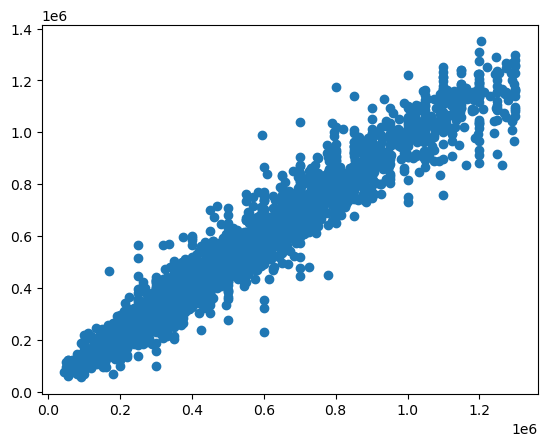

In [32]:
plt.scatter(y_test,y_pred_lgb)
plt.show()